In [3]:
from torch.utils.data import WeightedRandomSampler
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torchvision import datasets, models, transforms
import time
import os
import copy
from torch.utils.data import DataLoader, TensorDataset, WeightedRandomSampler
from torchvision.datasets import ImageFolder
import numpy as np
import matplotlib.pyplot as plt
import cv2
import numpy as np
import imageio as io
from PIL import Image
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision
import torchvision.transforms as transforms
from pytorch_lightning.callbacks import EarlyStopping
from pytorch_lightning.callbacks import ModelCheckpoint
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

import torchmetrics
import pytorch_lightning as pl

import data_loader as dl
import experiments as e


!python --version
!nvcc --version
!pip install nvcc4jupyter
%load_ext nvcc4jupyter
class_names = ['Abstract_Expressionism','Baroque','Cubism', 'Fauvism', 'Impressionism','Naive_Art_Primitivism','Pointillism','Rococo','Ukiyo_e']

num_classes = 9


Python 3.11.6
/usr/bin/sh: line 1: nvcc: command not found
Source files will be saved in "/tmp/tmp6wq0rv6l".


In [ ]:
!git clone https://github.com/jalpv1//artfaces-select10
!rm -rf .//artfaces-select10/.git
model_name ="resnet18_2_faces"

In [2]:
!pip install torchsampler
!pip install xgboost
!pip install torchmetrics
!pip install pytorch_lightning
!pip install optuna
!pip install memory_profiler
!pip install scikit-learn
!pip install matplotlib
! pip install imageio
! pip install cv2
! pip install scikit-image
!pip install opencv-python-headless

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 766.7/766.7 MB 8.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 17.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 130.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 116.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 106.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 9.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 27.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 73.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 39.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [5]:
class ArtStyleDataset(Dataset):
  def __init__(self, root_dir, transform = None, transform_tensor = None):
     self.imgs = ImageFolder(root_dir)
     self.root_dir = root_dir
     self.transform = transform
     self.transform_tensor = transform_tensor


  def __len__(self):
        return len(self.imgs)

  def __getitem__(self, idx):
        sample, label = self.imgs[idx]
        if self.transform:
            sample = self.transform(sample)
        return sample, label
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])
data = ArtStyleDataset('artfaces-select10', transform)


In [6]:
model_name ="resnet_2_FACES"

class Model (torch.nn.Module):
  def __init__(self, layer_name: str = 'layer2'):
     super(Model, self).__init__()
     self.model = models.resnet18(pretrained=True)
     self.layer_name = layer_name

     self.activations = dict()

     def hook(module, input, output):
        self.activations[layer_name] = output

     self.model.get_submodule(layer_name).register_forward_hook(hook)

  def forward(self, x):
        _ = self.model(x)
        return self.activations[self.layer_name]

In [7]:
device = 'cuda'

model = Model().to(device)
dataset = dl.data_load(data)
train_data , train_labels,map_img_feature = dl.extract_features(model, dataset)
dl.save_pickle(train_data,train_labels, model_name)

/opt/conda/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /home//.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:02<00:00, 17.9MB/s]


(128,)
(227,)
----------------------------------
(128,)


/opt/conda/lib/python3.11/site-packages/skimage/feature/texture.py:385: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


(227,)
----------------------------------
(128,)
(227,)
----------------------------------
(128,)
(227,)
----------------------------------
(128,)
(227,)
----------------------------------
(128,)
(227,)
----------------------------------
(128,)
(227,)
----------------------------------
(128,)
(227,)
----------------------------------
(128,)
(227,)
----------------------------------
(128,)
(227,)
----------------------------------
(128,)
(227,)
----------------------------------
(128,)
(227,)
----------------------------------
(128,)
(227,)
----------------------------------
(128,)
(227,)
----------------------------------
(128,)
(227,)
----------------------------------
(128,)
(227,)
----------------------------------
(128,)
(227,)
----------------------------------
(128,)
(227,)
----------------------------------
(128,)
(227,)
----------------------------------
(128,)
(227,)
----------------------------------
(128,)
(227,)
----------------------------------
(128,)
(227,)
-------------

In [8]:
model_name ="resnet_3_FACES"

class Model (torch.nn.Module):
  def __init__(self, layer_name: str = 'layer3'):
     super(Model, self).__init__()
     self.model = models.resnet18(pretrained=True)
     self.layer_name = layer_name

     self.activations = dict()

     def hook(module, input, output):
        self.activations[layer_name] = output

     self.model.get_submodule(layer_name).register_forward_hook(hook)

  def forward(self, x):
        _ = self.model(x)
        return self.activations[self.layer_name]

In [9]:
device = 'cuda'

model = Model().to(device)
dataset = dl.data_load(data)
train_data , train_labels,map_img_feature = dl.extract_features(model, dataset)
dl.save_pickle(train_data,train_labels, model_name)

/opt/conda/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


(256,)
(355,)
----------------------------------
(256,)
(355,)
----------------------------------
(256,)
(355,)
----------------------------------
(256,)
(355,)
----------------------------------
(256,)
(355,)
----------------------------------
(256,)
(355,)
----------------------------------
(256,)
(355,)
----------------------------------
(256,)
(355,)
----------------------------------
(256,)
(355,)
----------------------------------
(256,)
(355,)
----------------------------------
(256,)
(355,)
----------------------------------
(256,)
(355,)
----------------------------------
(256,)
(355,)
----------------------------------
(256,)
(355,)
----------------------------------
(256,)
(355,)
----------------------------------
(256,)
(355,)
----------------------------------
(256,)
(355,)
----------------------------------
(256,)
(355,)
----------------------------------
(256,)
(355,)
----------------------------------
(256,)
(355,)
----------------------------------
(256,)
(355,)
------

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
train_data_scaled = scaler.fit_transform(train_data)

train_labels = np.array(train_labels)
train_labels = train_labels.ravel()


print(f"Train: {len(X_train)}, Test: {len(X_test)}")

Train: 8590, Test: 2148


/opt/conda/lib/python3.11/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                        precision    recall  f1-score      support
Abstract_Expressionism   0.500000  1.000000  0.666667     1.000000
Baroque                  0.953744  0.861692  0.905384  1005.000000
Cubism                   0.705882  0.878049  0.782609    41.000000
Fauvism                  0.760000  1.000000  0.863636    19.000000
Impressionism            0.883562  0.891192  0.887360   579.000000
Naive_Art_Primitivism    0.740260  0.897638  0.811388   127.000000
Pointillism              0.750000  1.000000  0.857143     9.000000
Rococo                   0.821333  0.922156  0.868829   334.000000
Ukiyo_e                  0.891892  1.000000  0.942857    33.000000
accuracy                 0.885475  0.885475  0.885475     0.885475
macro avg                0.778519  0.938970  0.842875  2148.000000
weighted avg             0.893155  0.885475  0.886834  2148.000000
-----------------------------------------------------------------------------------------------------------


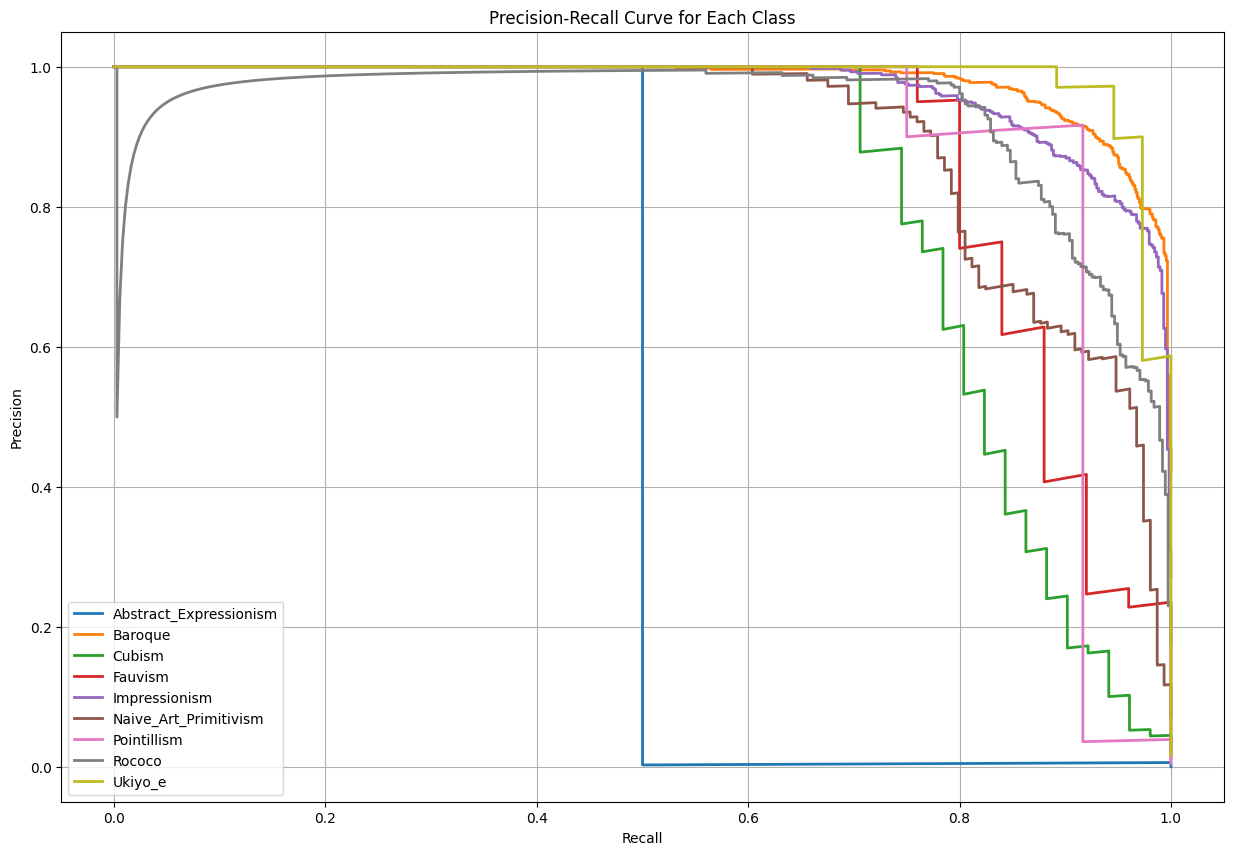

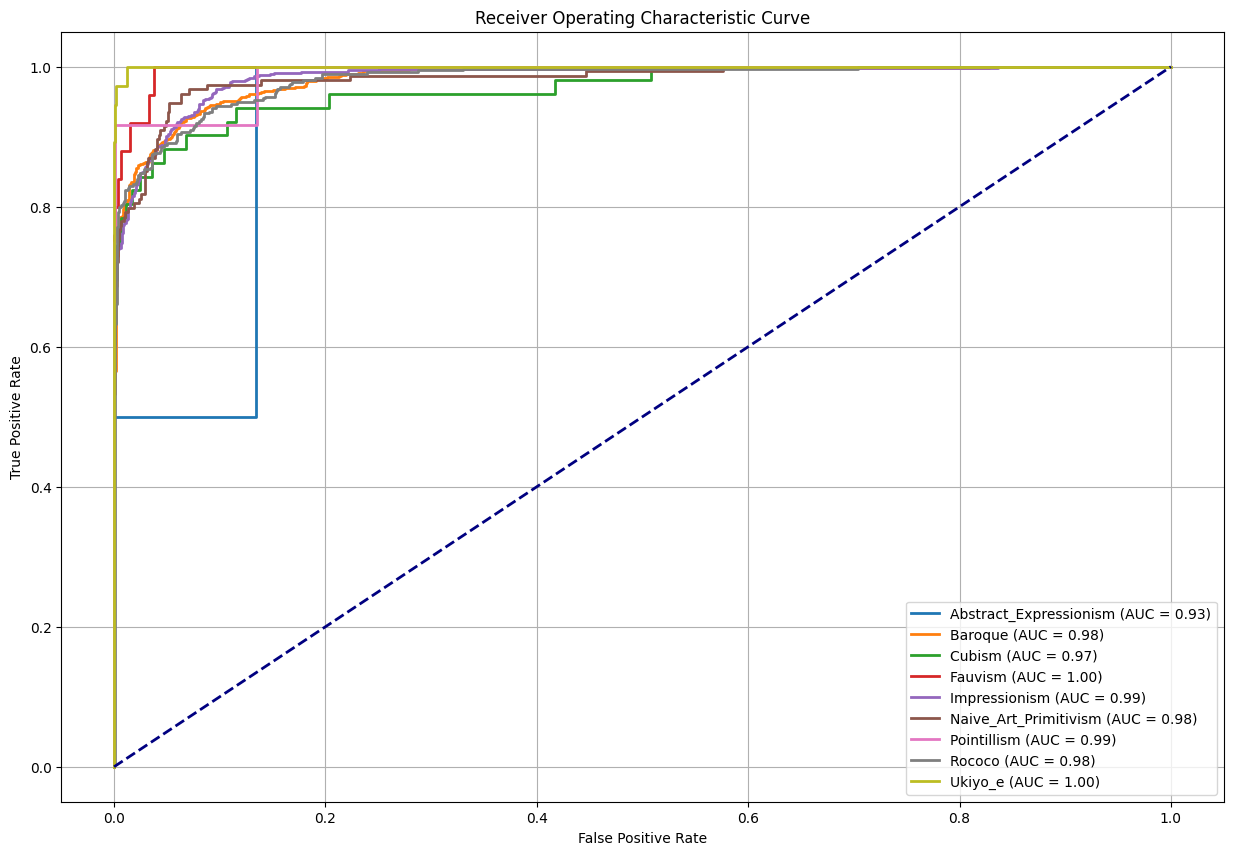

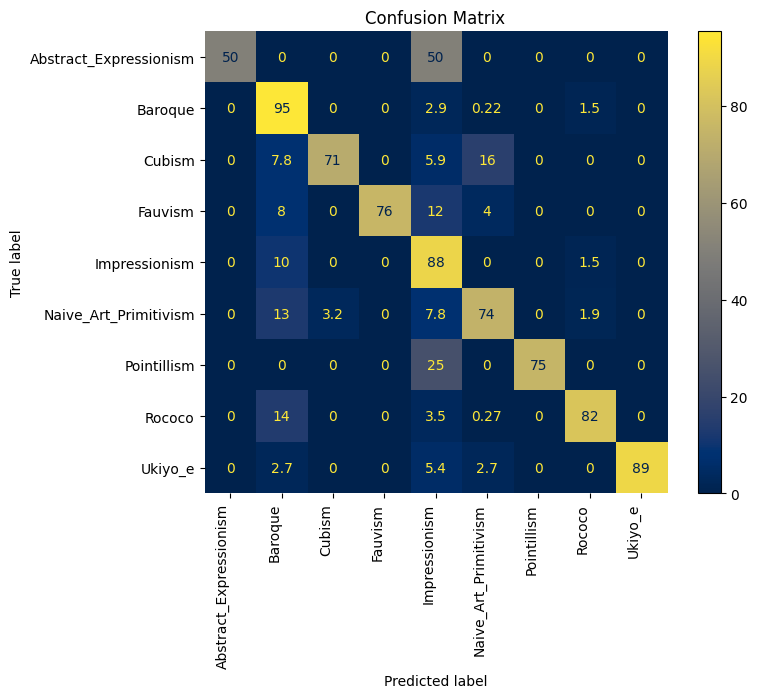

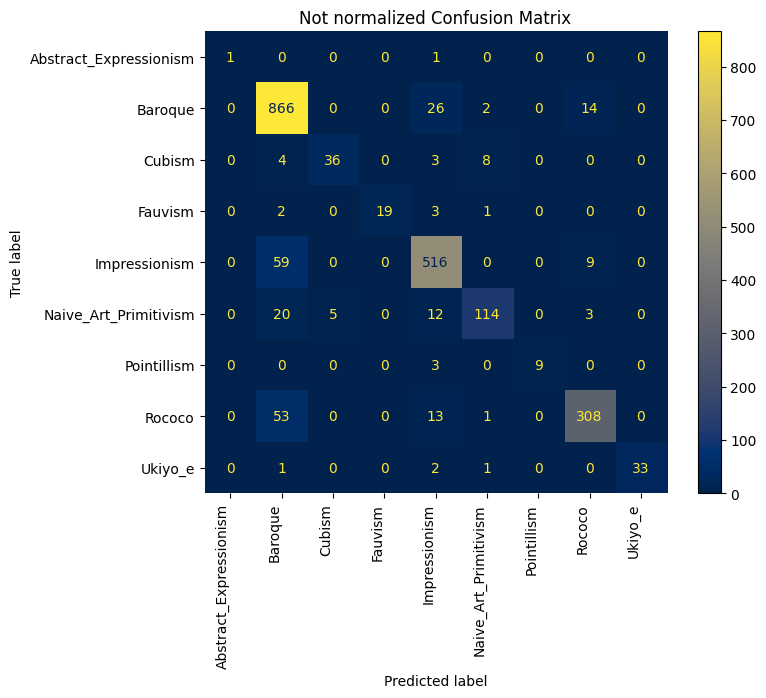

In [13]:
from sklearn.svm import SVC

svc_model = SVC(
    kernel='poly', 
    C=60.38139932266792, 
    gamma=3.011984770287577, 
    degree=2, 
    random_state=42,
    probability = True
)

svc_model.fit(X_train_scaled, y_train)
frmodel_pred = svc_model.predict(X_test_scaled)
frmodel_pred_proba = svc_model.predict_proba(X_test_scaled)

evaluate_model(y_test,frmodel_pred,frmodel_pred_proba)

In [14]:
avg= e.kfold_crossvalidation(train_data, train_labels, 5,  svc_model , 1)
print(avg)

       Fold  Precision    Recall        F1  Accuracy  Train time  \
0         1   0.897737  0.895251  0.894092  0.895251   58.183821   
1         2   0.887691  0.883613  0.882085  0.883613   61.340033   
2         3   0.894905  0.892458  0.891453  0.892458   62.018332   
3         4   0.884761  0.881230  0.879648  0.881230   62.514699   
4         5   0.880387  0.878435  0.877035  0.878435   60.888000   
5   Average   0.889096  0.886197  0.884863  0.886197   60.988977   
6  1.581139   0.007160  0.007294  0.007497  0.007294    1.687434   

   Prediction time  
0         1.169236  
1         1.162083  
2         1.117131  
3         1.230942  
4         1.181524  
5         1.172183  
6         0.040869  


/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


/opt/conda/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWa

                        precision    recall  f1-score      support
Abstract_Expressionism   0.000000  0.000000  0.000000     0.000000
Baroque                  0.914097  0.889603  0.901684   933.000000
Cubism                   0.745098  0.703704  0.723810    54.000000
Fauvism                  0.640000  0.842105  0.727273    19.000000
Impressionism            0.876712  0.890435  0.883520   575.000000
Naive_Art_Primitivism    0.811688  0.791139  0.801282   158.000000
Pointillism              0.583333  0.777778  0.666667     9.000000
Rococo                   0.821333  0.841530  0.831309   366.000000
Ukiyo_e                  0.891892  0.970588  0.929577    34.000000
accuracy                 0.870112  0.870112  0.870112     0.870112
macro avg                0.698239  0.745209  0.718347  2148.000000
weighted avg             0.872340  0.870112  0.870888  2148.000000
-----------------------------------------------------------------------------------------------------------


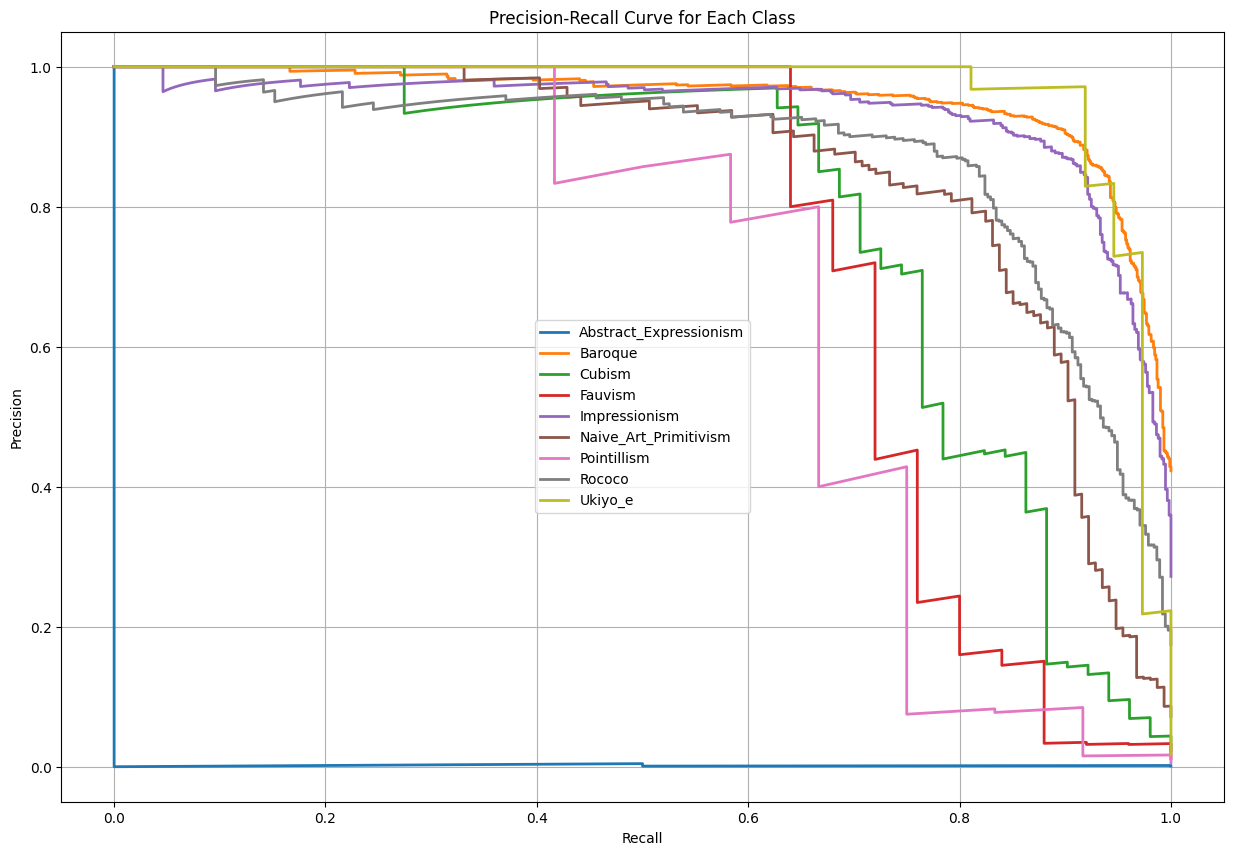

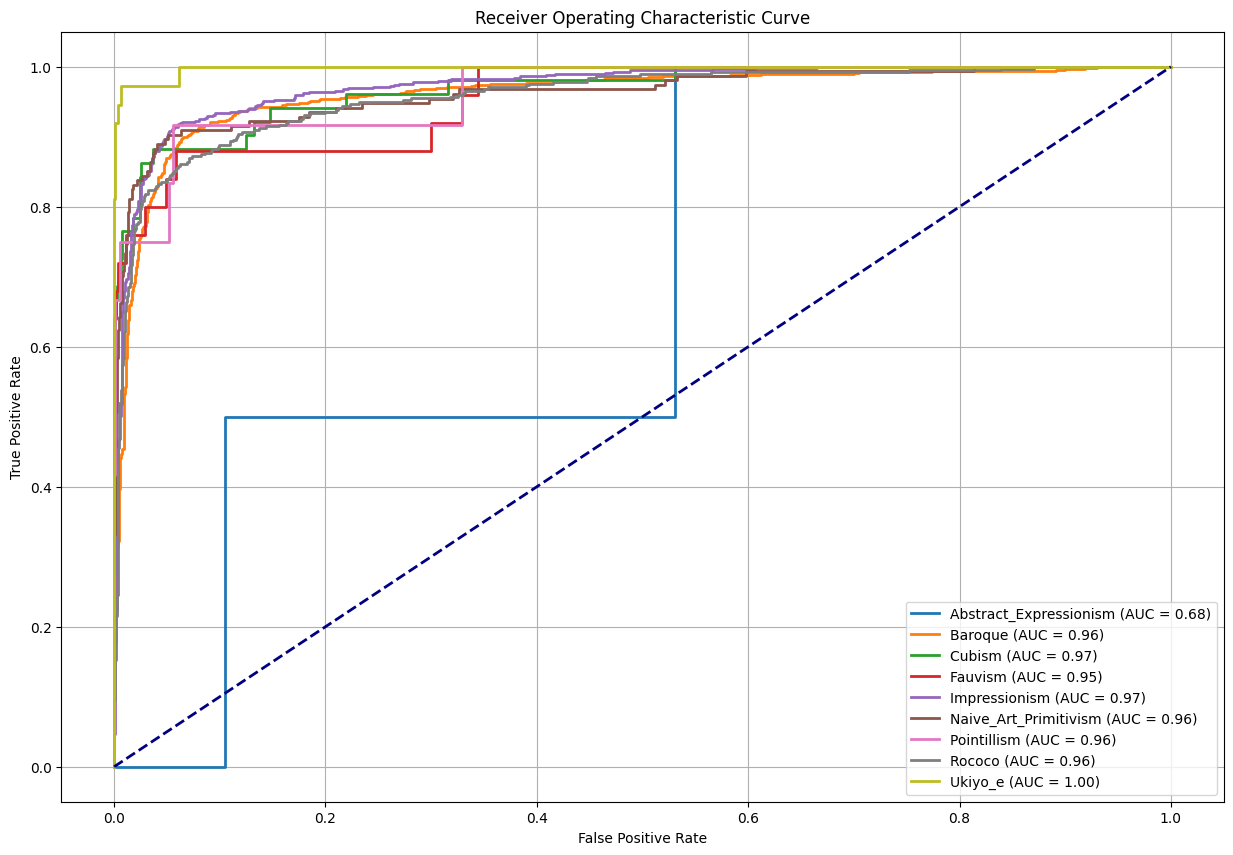

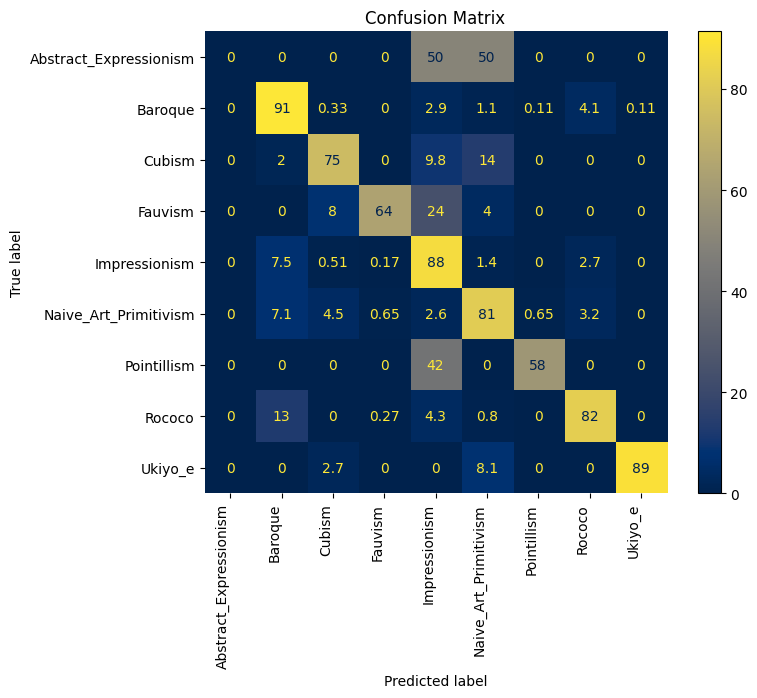

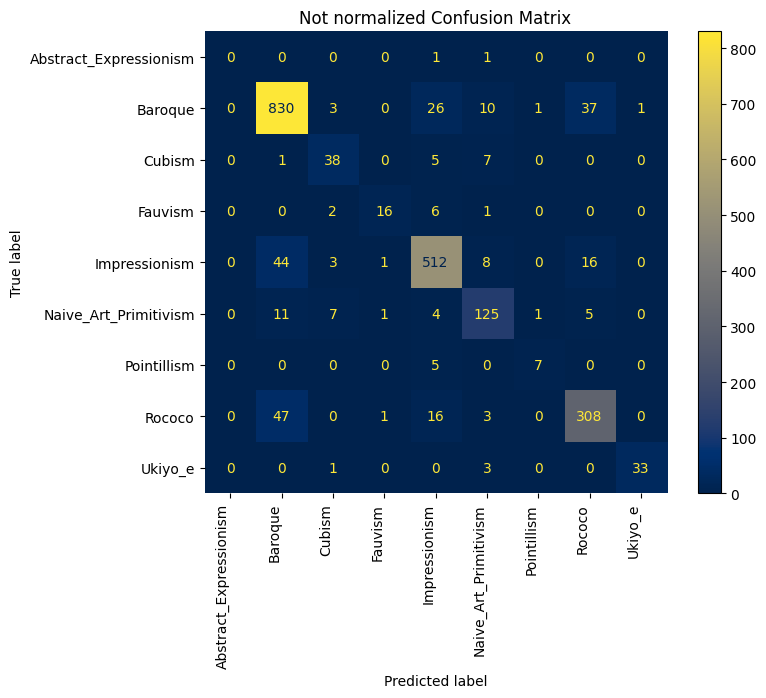

In [17]:
mlp_model = MLPClassifier(
    hidden_layer_sizes=(440, 170, 69),  
    solver='adam',
    learning_rate_init=0.0005148340246615198,
    alpha=1.6324225737227937e-05,  
    batch_size=64,  
    activation='logistic',  
    max_iter=610,  
    random_state=42,
    early_stopping=True  
)

mlp_model.fit(X_train_scaled, y_train)
frmodel_pred = mlp_model.predict(X_test_scaled)
frmodel_pred_proba = mlp_model.predict_proba(X_test_scaled)

evaluate_model(y_test,frmodel_pred,frmodel_pred_proba)

In [18]:
avg= e.kfold_crossvalidation(train_data, train_labels, 5,  mlp_model , 1)
print(avg)

/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/m

       Fold  Precision    Recall        F1  Accuracy  Train time  \
0         1   0.886926  0.887337  0.886663  0.887337   28.169212   
1         2   0.873026  0.874302  0.872970  0.874302   31.699143   
2         3   0.867988  0.867318  0.867169  0.867318   28.864371   
3         4   0.870582  0.870983  0.870527  0.870983   31.304010   
4         5   0.866198  0.867257  0.866497  0.867257   30.912211   
5   Average   0.872944  0.873439  0.872765  0.873439   30.189789   
6  1.581139   0.008234  0.008301  0.008198  0.008301    1.571703   

   Prediction time  
0         0.017334  
1         0.016607  
2         0.016386  
3         0.015919  
4         0.016827  
5         0.016615  
6         0.000524  


/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [12]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
import  numpy as np
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import time
import psutil
import pandas as pd
from sklearn.metrics import  ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import (
    classification_report, roc_curve, auc, precision_recall_curve, confusion_matrix
)
def precision_recall_draw(y_true, y_score):
    from sklearn.preprocessing import label_binarize
    from sklearn.metrics import precision_recall_curve

    y_test_bin = label_binarize(y_true, classes=[i for i in range(len(class_names))])

    plt.figure(figsize=(15, 10))
    for i, class_name in enumerate(class_names):
        precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
        plt.plot(recall, precision, lw=2, label=f'{class_name}')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve for Each Class')
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()


def roc_draw(y_true, y_score):
  from sklearn.preprocessing import label_binarize
  plt.figure(figsize=(15, 10))
  y_test_bin = label_binarize(y_true, classes=[i for i in range(len(class_names))])


  for i, class_name in enumerate(class_names):
     fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
     roc_auc = auc(fpr, tpr)
     plt.plot(fpr, tpr, lw=2, label=f'{class_name} (AUC = {roc_auc:.2f})')


  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic Curve')
  plt.legend(loc="best")
  plt.grid(True)
  plt.show()


def evaluate_model(y_true, y_pred, y_pred_proba):
    report_dict = classification_report(y_pred, y_true, target_names=class_names, output_dict=True)
    metrics_df2 = pd.DataFrame(report_dict).transpose()
    print(metrics_df2)
    print("-----------------------------------------------------------------------------------------------------------")

    precision_recall_draw(y_true, y_pred_proba)
    roc_draw(y_true, y_pred_proba)
    cm =confusion_matrix(y_true, y_pred, normalize = 'true')
    #cm_percent_row = cm.astype('float') / cm.sum(axis=1, keepdims=True) * 100
    
    disp = ConfusionMatrixDisplay(cm*100, display_labels=class_names)

    fig, ax = plt.subplots(figsize=(8, 6))
    disp.plot(cmap="cividis", ax=ax) 
    for _, spine in ax.spines.items():
        spine.set_visible(False)  

    plt.xticks(rotation=90, ha="right")
    plt.yticks(rotation=0)
    plt.grid(False) 
    plt.title("Confusion Matrix")
    #plt.colorbar(ax.collections[0], ax=ax)  
    disp = ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred), display_labels=class_names)

    fig, ax = plt.subplots(figsize=(8, 6))
    disp.plot(cmap="cividis", ax=ax) 
    for _, spine in ax.spines.items():
        spine.set_visible(False)  

    plt.xticks(rotation=90, ha="right")
    plt.yticks(rotation=0)
    plt.grid(False) 
    plt.title("Not normalized Confusion Matrix")
    plt.show()

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle

with open('X_resnet_2_FACES.pickle', 'rb') as handle:
    train_data = pickle.load(handle)
with open('Y_resnet_2_FACES.pickle', 'rb') as handle:
    train_labels = pickle.load(handle)

X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
train_data_scaled = scaler.fit_transform(train_data)

train_labels = np.array(train_labels)
train_labels = train_labels.ravel()


print(f"Train: {np.shape(X_train)}, Test: {np.shape(X_test)}")
print(f"Train: {np.shape(train_data)}, Test: {np.shape(train_labels)}")

Train: (8590, 227), Test: (2148, 227)
Train: (10738, 227), Test: (10738,)


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
train_data_scaled = scaler.fit_transform(train_data)

train_labels = np.array(train_labels)
train_labels = train_labels.ravel()


print(f"Train: {len(X_train)}, Test: {len(X_test)}")

Train: 8590, Test: 2148


/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                        precision    recall  f1-score      support
Abstract_Expressionism   0.000000  0.000000  0.000000     0.000000
Baroque                  0.911243  0.861298  0.885566   894.000000
Cubism                   0.625000  0.681818  0.652174    44.000000
Fauvism                  0.642857  0.750000  0.692308    24.000000
Impressionism            0.870307  0.893170  0.881590   571.000000
Naive_Art_Primitivism    0.779412  0.878453  0.825974   181.000000
Pointillism              0.769231  0.952381  0.851064    21.000000
Rococo                   0.838046  0.842377  0.840206   387.000000
Ukiyo_e                  1.000000  0.807692  0.893617    26.000000
accuracy                 0.863128  0.863128  0.863128     0.863128
macro avg                0.715122  0.740799  0.724722  2148.000000
weighted avg             0.866888  0.863128  0.864135  2148.000000
-----------------------------------------------------------------------------------------------------------


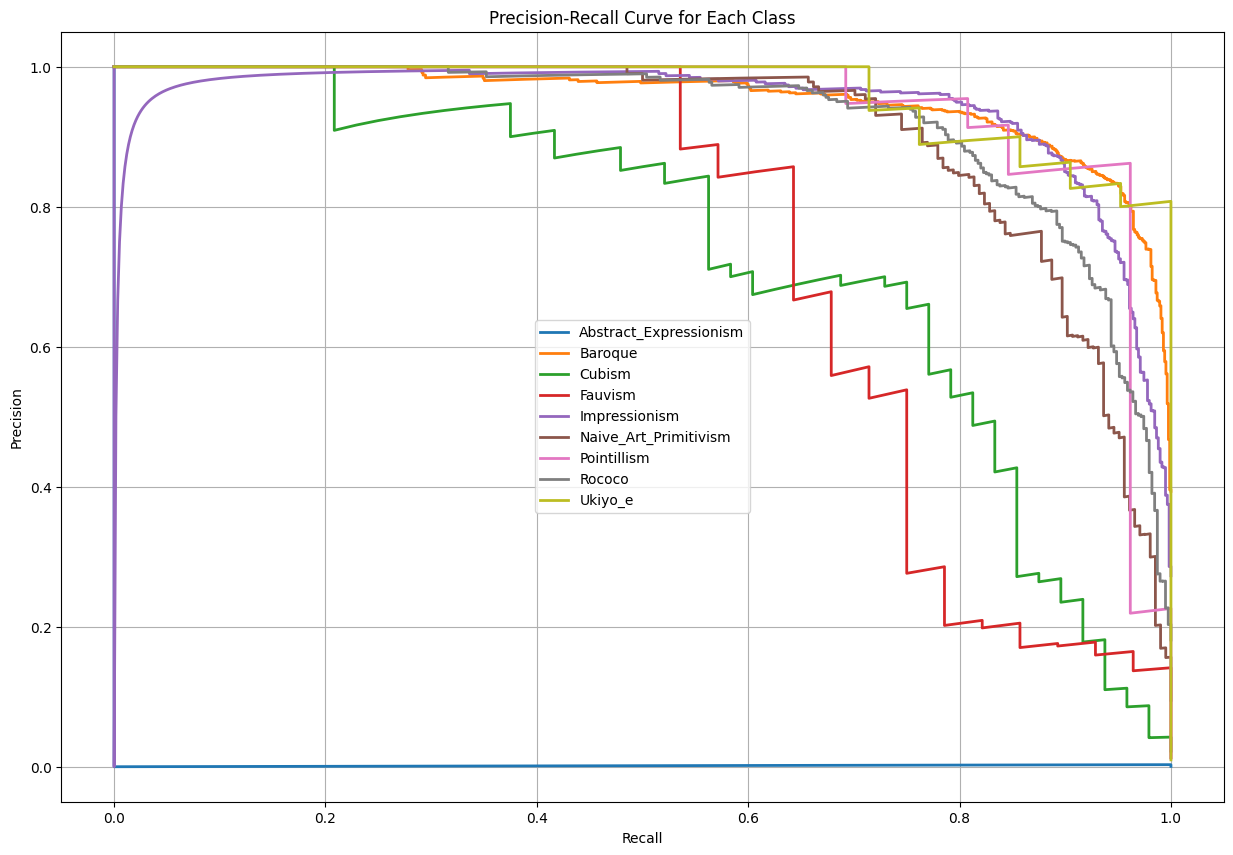

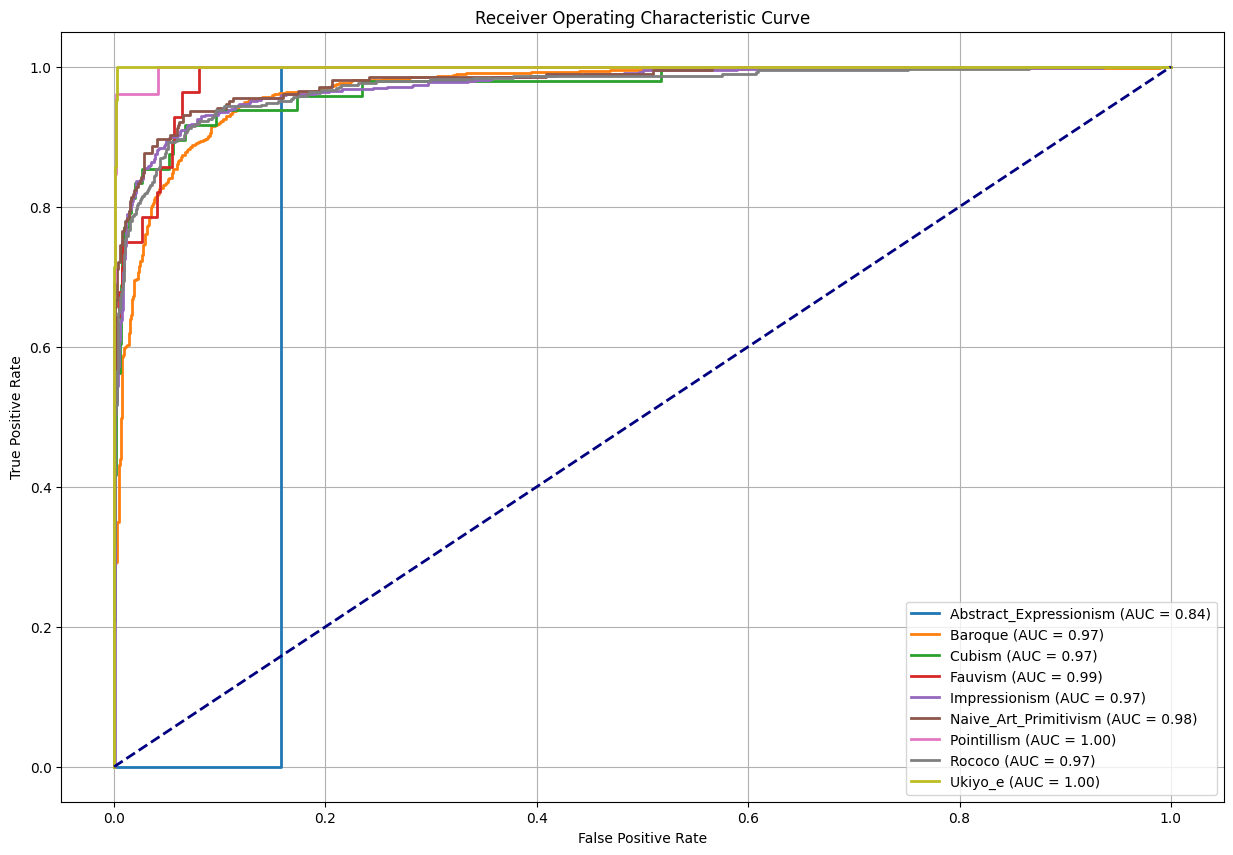

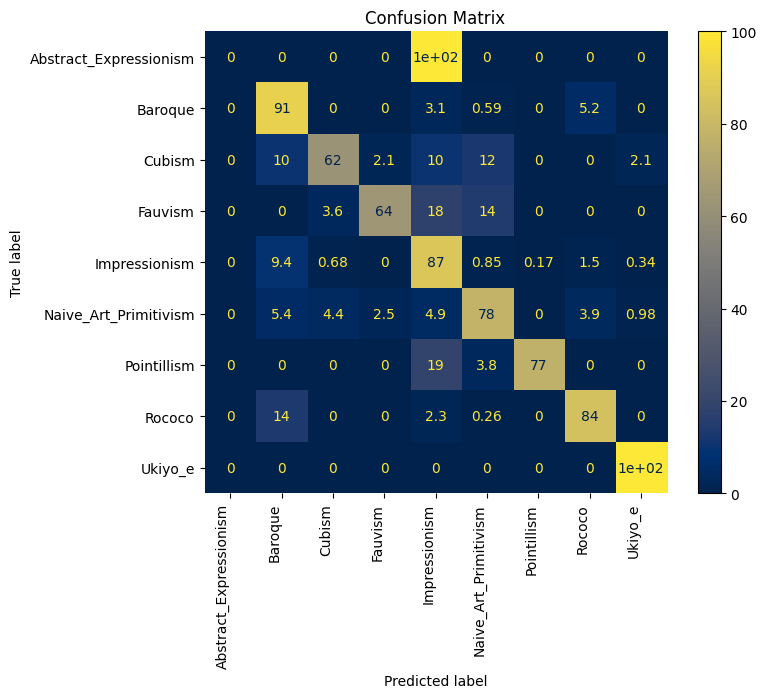

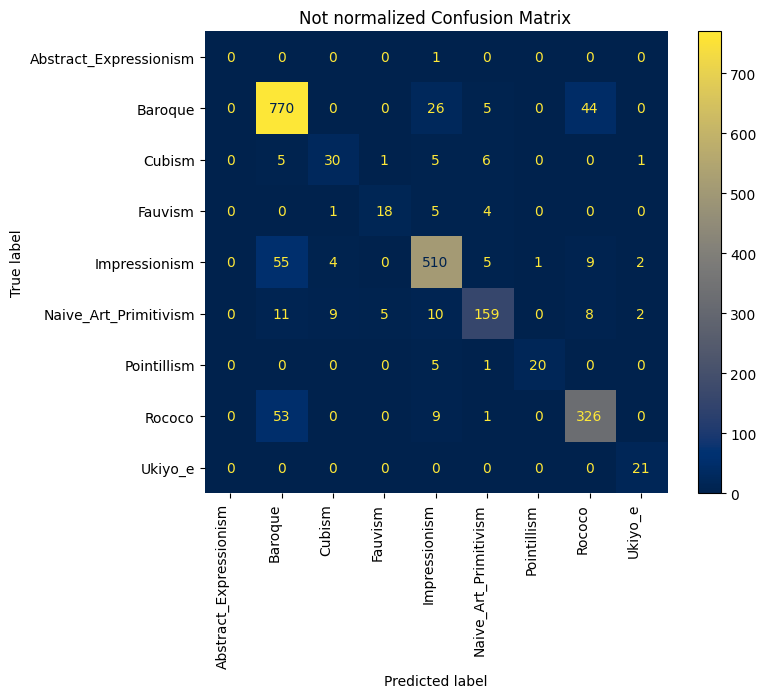

In [21]:
mlp_model = MLPClassifier(
    hidden_layer_sizes=(332, 130, 111),  
    solver='adam',
    learning_rate_init=0.0011935962091049461,
    alpha=9.880852955939257e-05,  
    batch_size=64,  
    activation='tanh',  
    max_iter=590,  
    random_state=42,
    early_stopping=True  
)

mlp_model.fit(X_train_scaled, y_train)
frmodel_pred = mlp_model.predict(X_test_scaled)
frmodel_pred_proba = mlp_model.predict_proba(X_test_scaled)

evaluate_model(y_test,frmodel_pred,frmodel_pred_proba)


In [22]:
mlp_model = MLPClassifier(
    hidden_layer_sizes=(332, 130, 111),  
    solver='adam',
    learning_rate_init=0.0011935962091049461,
    alpha=9.880852955939257e-05,  
    batch_size=64,  
    activation='tanh',  
    max_iter=590,  
    random_state=42,
    early_stopping=True  
)
avg= e.kfold_crossvalidation(train_data, train_labels, 5,  mlp_model , 1)
print(avg)

/opt/conda/lib/python3.11/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predic

       Fold  Precision    Recall        F1  Accuracy  Train time  \
0         1   0.873645  0.873371  0.872867  0.873371    9.329528   
1         2   0.882913  0.884544  0.883303  0.884544   12.830089   
2         3   0.878175  0.878026  0.877119  0.878026   17.966642   
3         4   0.878007  0.877503  0.877114  0.877503   15.016104   
4         5   0.872967  0.873312  0.872597  0.873312   11.557770   
5   Average   0.877141  0.877351  0.876600  0.877351   13.340026   
6  1.581139   0.004024  0.004593  0.004342  0.004593    3.306636   

   Prediction time  
0         0.020092  
1         0.023090  
2         0.022325  
3         0.019074  
4         0.022547  
5         0.021426  
6         0.001742  


                        precision    recall  f1-score      support
Abstract_Expressionism   0.000000  0.000000  0.000000     1.000000
Baroque                  0.901775  0.861991  0.881434   884.000000
Cubism                   0.750000  0.900000  0.818182    40.000000
Fauvism                  0.535714  0.750000  0.625000    20.000000
Impressionism            0.848123  0.893885  0.870403   556.000000
Naive_Art_Primitivism    0.843137  0.895833  0.868687   192.000000
Pointillism              0.769231  0.869565  0.816327    23.000000
Rococo                   0.861183  0.817073  0.838548   410.000000
Ukiyo_e                  0.952381  0.909091  0.930233    22.000000
accuracy                 0.864525  0.864525  0.864525     0.864525
macro avg                0.717949  0.766382  0.738757  2148.000000
weighted avg             0.867343  0.864525  0.865080  2148.000000
-----------------------------------------------------------------------------------------------------------


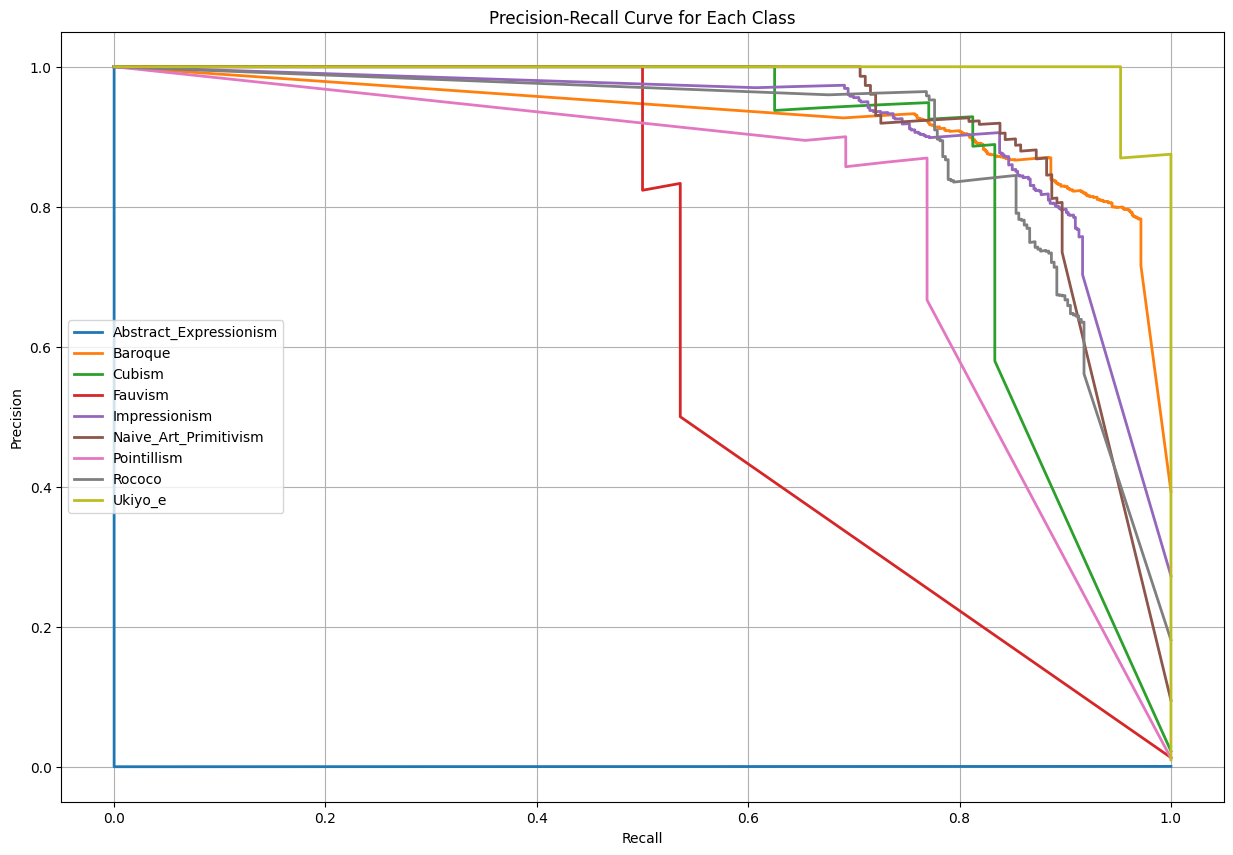

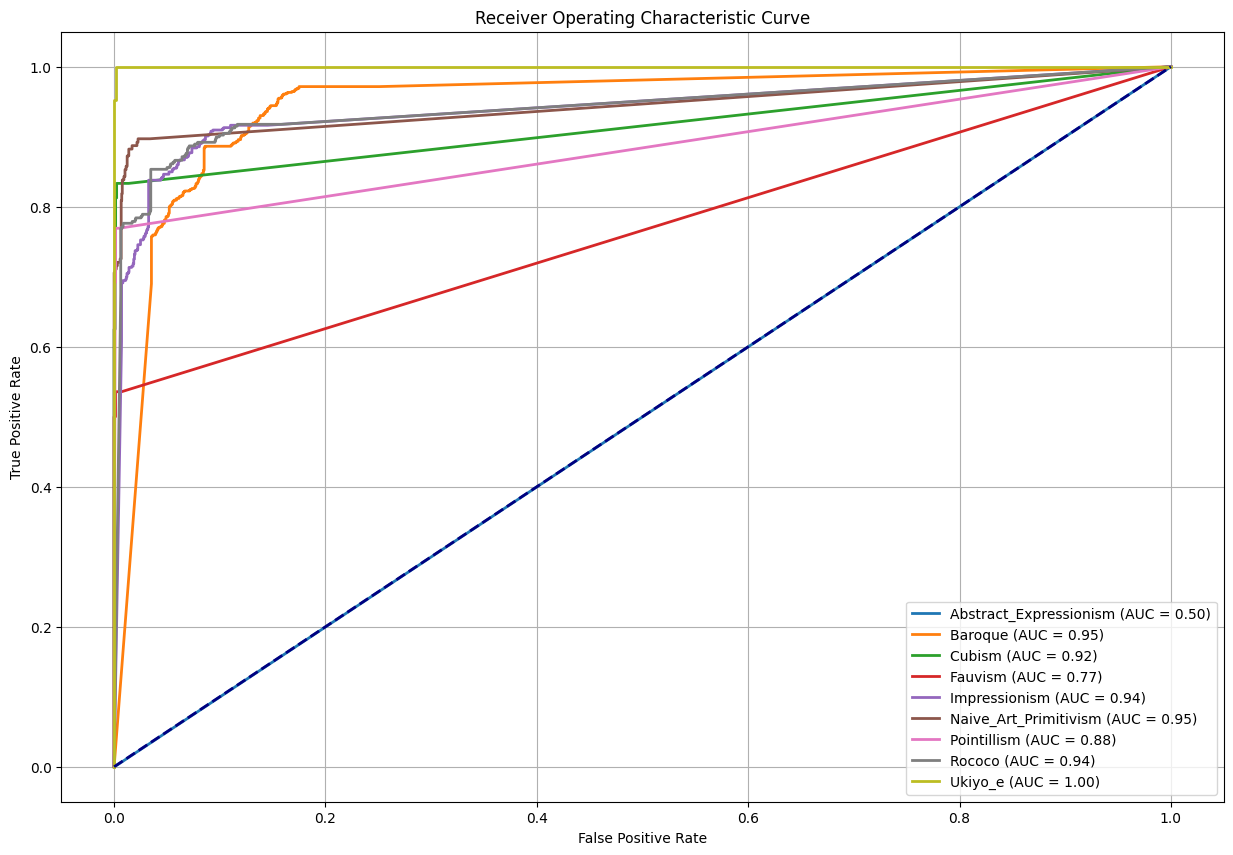

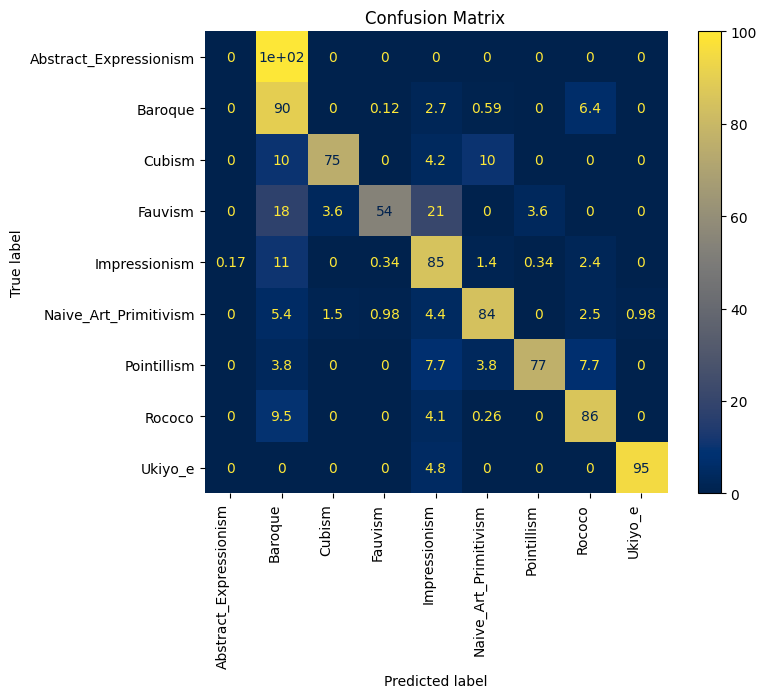

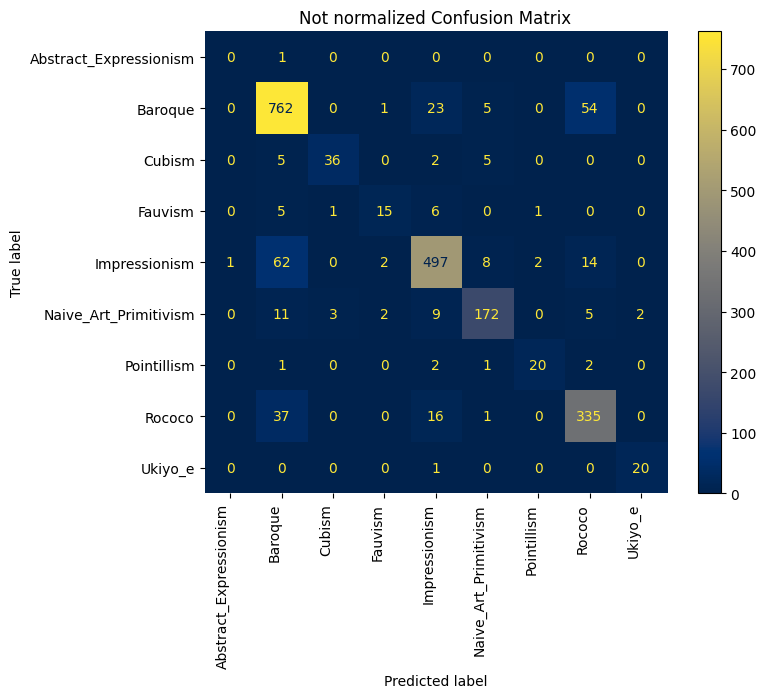

In [23]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(
    metric='manhattan',
    algorithm='auto',
    n_neighbors=3,
    weights='distance',
    leaf_size=40,
    p=1  
)

knn_model.fit(X_train_scaled, y_train)
frmodel_pred = knn_model.predict(X_test_scaled)
frmodel_pred_proba = knn_model.predict_proba(X_test_scaled)

evaluate_model(y_test,frmodel_pred,frmodel_pred_proba)

In [24]:
knn_model = KNeighborsClassifier(
    metric='manhattan',
    algorithm='auto',
    n_neighbors=3,
    weights='distance',
    leaf_size=40,
    p=1  
)
avg= e.kfold_crossvalidation(train_data, train_labels, 5,  knn_model , 1)
print(avg)

/opt/conda/lib/python3.11/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predic

       Fold  Precision    Recall        F1  Accuracy  Train time  \
0         1   0.872615  0.871508  0.871435  0.871508    0.005625   
1         2   0.851823  0.851955  0.851430  0.851955    0.039318   
2         3   0.863332  0.862197  0.861615  0.862197    0.008871   
3         4   0.846422  0.845366  0.845026  0.845366    0.007551   
4         5   0.861358  0.860270  0.860023  0.860270    0.006600   
5   Average   0.859110  0.858259  0.857906  0.858259    0.013593   
6  1.581139   0.010239  0.010013  0.010113  0.010013    0.014430   

   Prediction time  
0         0.207834  
1         0.209907  
2         0.209611  
3         0.207225  
4         0.208935  
5         0.208702  
6         0.001147  


/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                        precision    recall  f1-score      support
Abstract_Expressionism   0.000000  0.000000  0.000000     0.000000
Baroque                  0.931361  0.889266  0.909827   885.000000
Cubism                   0.750000  1.000000  0.857143    36.000000
Fauvism                  0.678571  0.950000  0.791667    20.000000
Impressionism            0.923208  0.889803  0.906198   608.000000
Naive_Art_Primitivism    0.862745  0.936170  0.897959   188.000000
Pointillism              0.769231  1.000000  0.869565    20.000000
Rococo                   0.861183  0.902965  0.881579   371.000000
Ukiyo_e                  0.904762  0.950000  0.926829    20.000000
accuracy                 0.899907  0.899907  0.899907     0.899907
macro avg                0.742340  0.835356  0.782307  2148.000000
weighted avg             0.903776  0.899907  0.900682  2148.000000
-----------------------------------------------------------------------------------------------------------


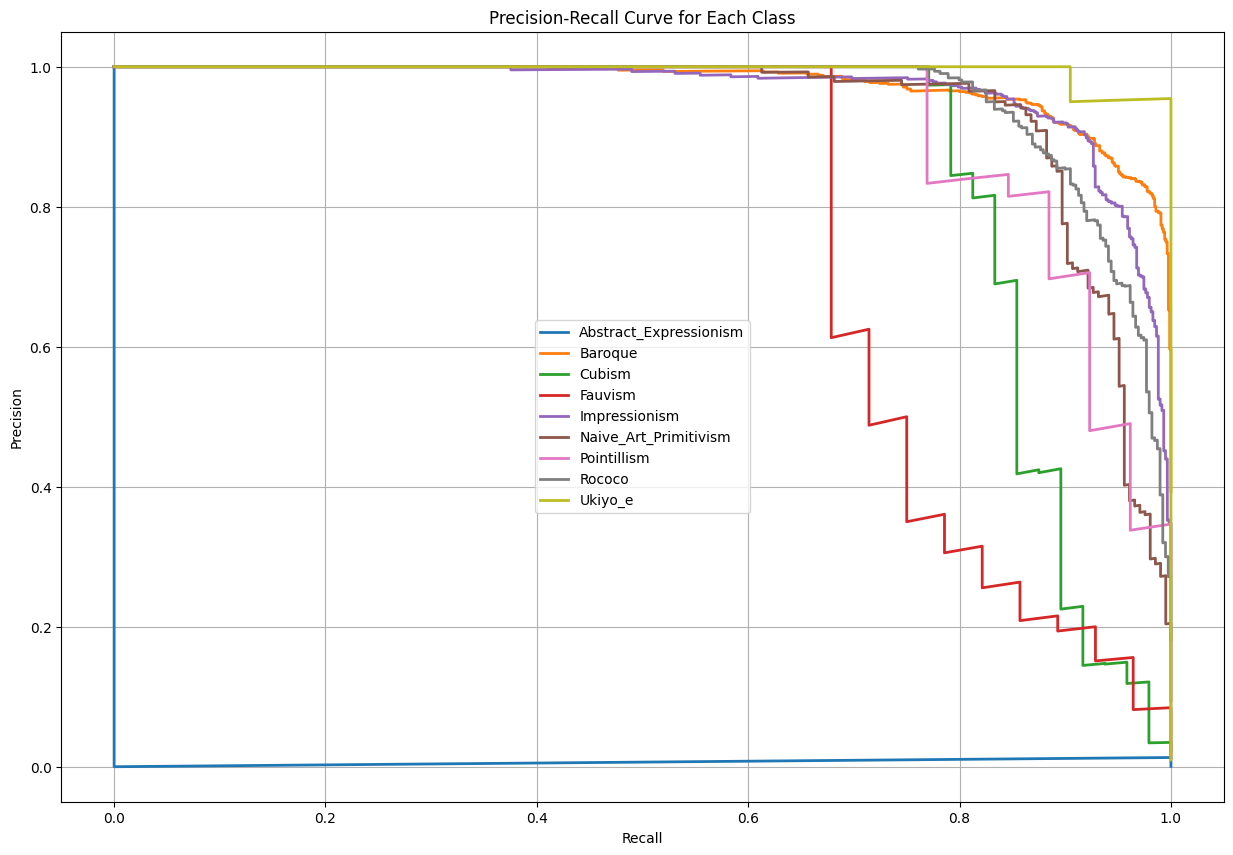

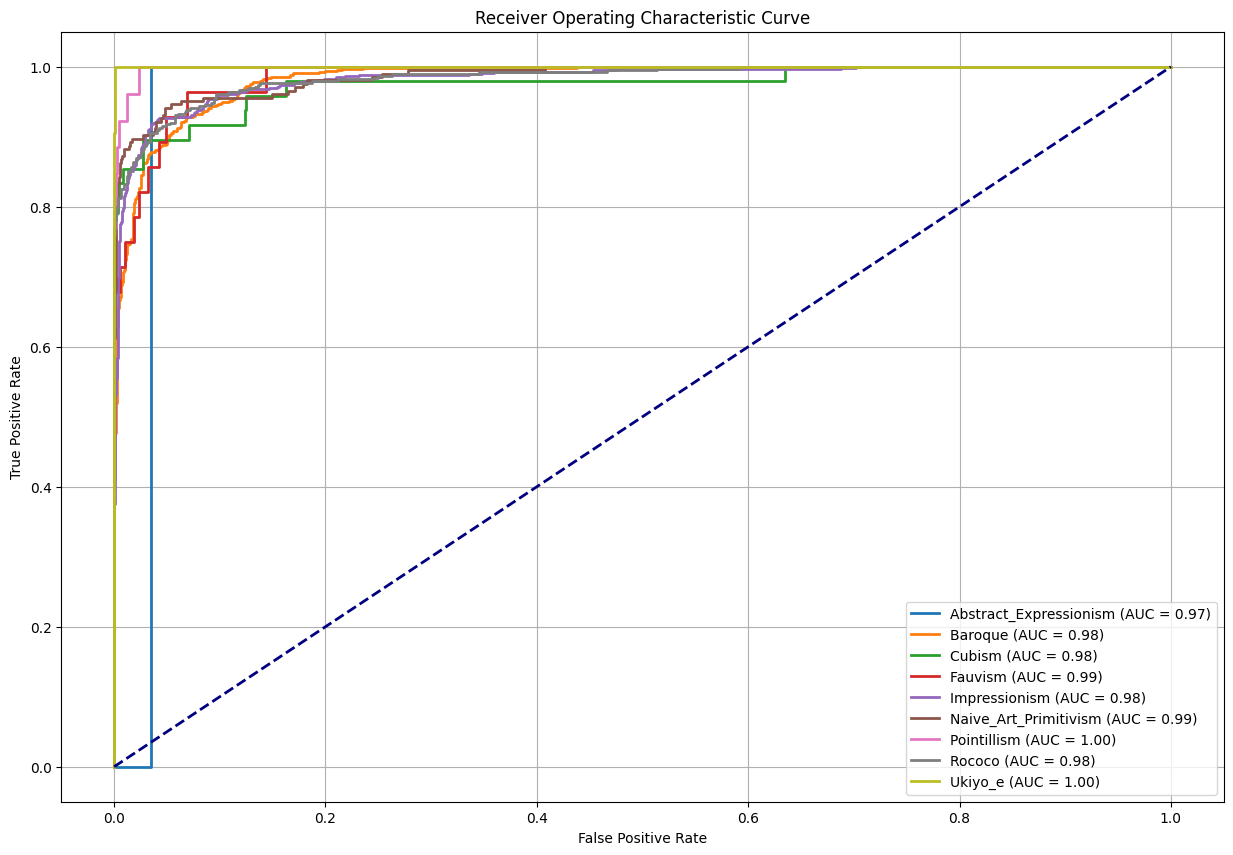

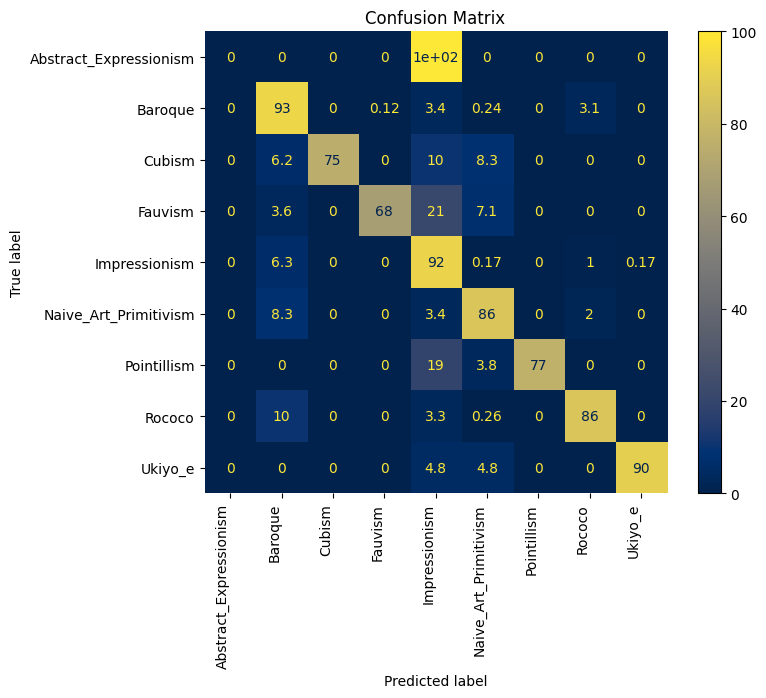

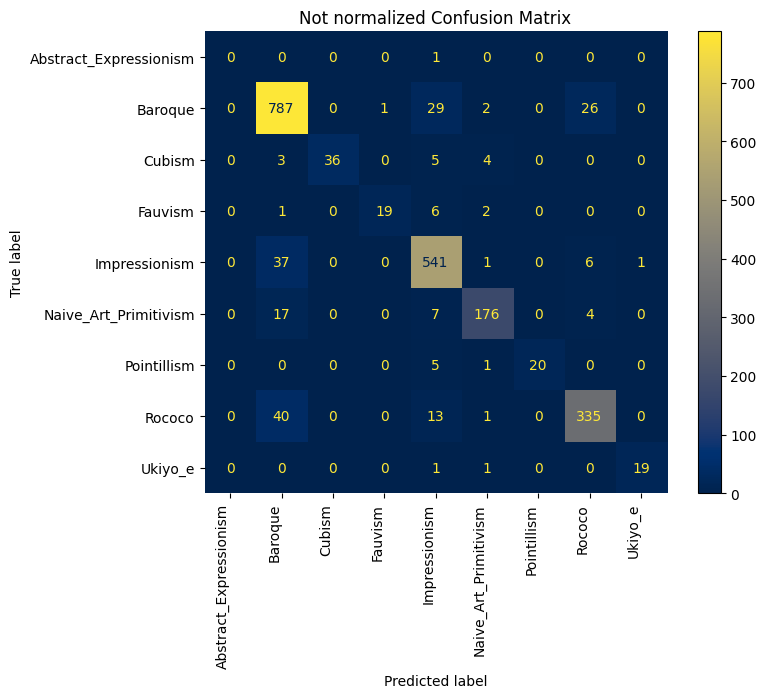

In [25]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(
    n_estimators=700,
    max_depth=6,
    learning_rate=0.06880464674379164,
    subsample=0.5717805315996993,
    colsample_bytree=0.72163837917479,
    gamma= 0.739211143509742,
    reg_lambda=0.31918802481802655,
    reg_alpha=0.5515715243593446,
    objective="multi:softmax",  
    eval_metric="mlogloss",
    tree_method="hist", 
)
xgb_model.fit(X_train_scaled, y_train)
frmodel_pred = xgb_model.predict(X_test_scaled)
frmodel_pred_proba = xgb_model.predict_proba(X_test_scaled)

evaluate_model(y_test,frmodel_pred,frmodel_pred_proba)


In [26]:
xgb_model = xgb.XGBClassifier(
    n_estimators=700,
    max_depth=6,
    learning_rate=0.06880464674379164,
    subsample=0.5717805315996993,
    colsample_bytree=0.72163837917479,
    gamma= 0.739211143509742,
    reg_lambda=0.31918802481802655,
    reg_alpha=0.5515715243593446,
    objective="multi:softmax",  
    eval_metric="mlogloss",
    tree_method="hist", 
)
avg= e.kfold_crossvalidation(train_data, train_labels, 5,  xgb_model , 1)
print(avg)

/opt/conda/lib/python3.11/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predic

       Fold  Precision    Recall        F1  Accuracy  Train time  \
0         1   0.906938  0.906425  0.906012  0.906425   16.445778   
1         2   0.901909  0.900372  0.899071  0.900372   17.276556   
2         3   0.903296  0.901304  0.899999  0.901304   16.314714   
3         4   0.901528  0.898929  0.897926  0.898929   15.632628   
4         5   0.897397  0.895203  0.894458  0.895203   15.979211   
5   Average   0.902214  0.900446  0.899493  0.900446   16.329778   
6  1.581139   0.003437  0.004071  0.004205  0.004071    0.616236   

   Prediction time  
0         0.014207  
1         0.010630  
2         0.012208  
3         0.013869  
4         0.013745  
5         0.012932  
6         0.001499  


                        precision    recall  f1-score     support
Abstract_Expressionism   0.000000  0.000000  0.000000     0.00000
Baroque                  0.962130  0.853992  0.904841   952.00000
Cubism                   0.729167  1.000000  0.843373    35.00000
Fauvism                  0.535714  1.000000  0.697674    15.00000
Impressionism            0.875427  0.872449  0.873935   588.00000
Naive_Art_Primitivism    0.828431  0.954802  0.887139   177.00000
Pointillism              0.730769  1.000000  0.844444    19.00000
Rococo                   0.845758  0.959184  0.898907   343.00000
Ukiyo_e                  0.904762  1.000000  0.950000    19.00000
accuracy                 0.890130  0.890130  0.890130     0.89013
macro avg                0.712462  0.848936  0.766702  2148.00000
weighted avg             0.899468  0.890130  0.891392  2148.00000
-----------------------------------------------------------------------------------------------------------


/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


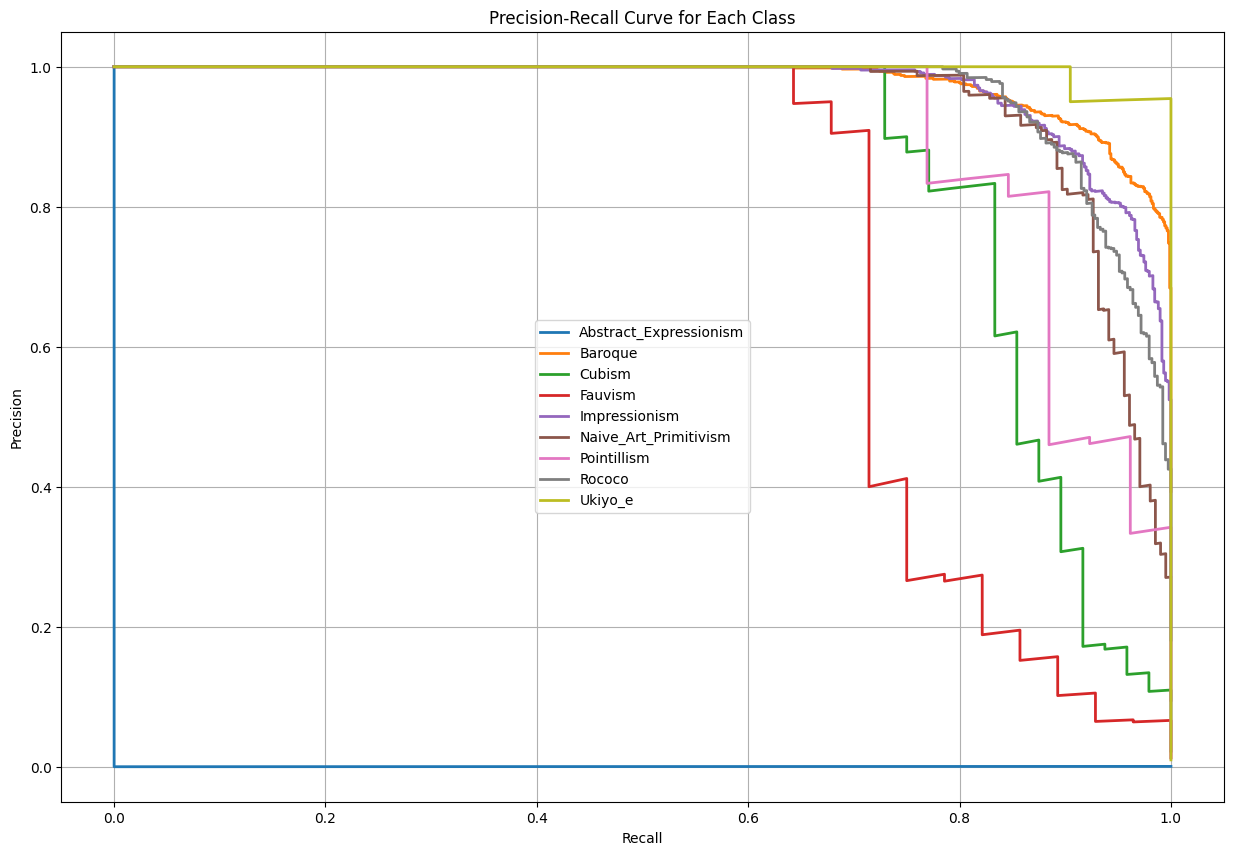

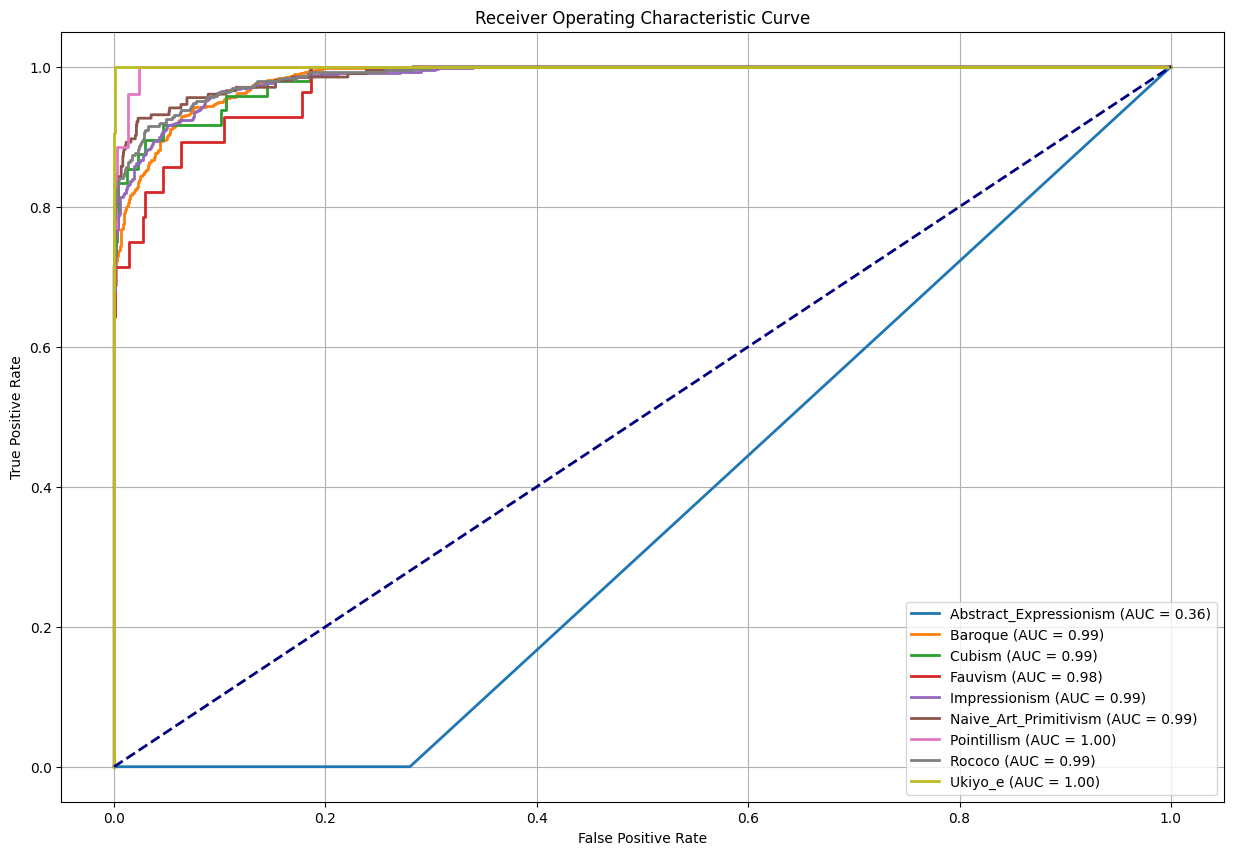

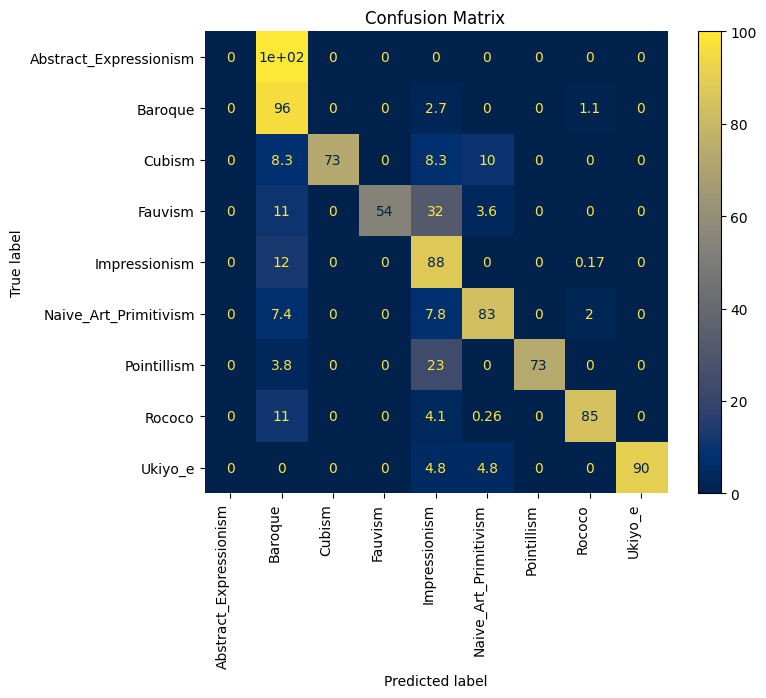

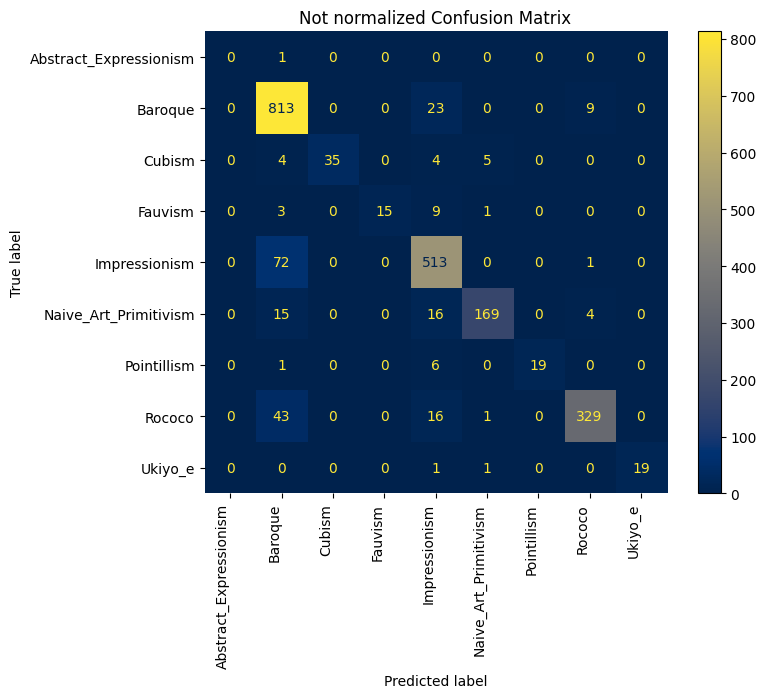

In [27]:
from sklearn.ensemble import RandomForestClassifier

rfmodel = RandomForestClassifier(n_estimators = 1100, 
                                 max_depth = 31, 
                                 min_samples_split =  8,
                                 min_samples_leaf = 2, 
                                 max_features = 'sqrt', 
                                 bootstrap = False,  
                                 criterion = 'gini')
rfmodel.fit(X_train_scaled, y_train)
frmodel_pred = rfmodel.predict(X_test_scaled)
frmodel_pred_proba = rfmodel.predict_proba(X_test_scaled)

evaluate_model(y_test,frmodel_pred,frmodel_pred_proba)

In [28]:
rfmodel = RandomForestClassifier(n_estimators = 1100, 
                                 max_depth = 31, 
                                 min_samples_split =  8,
                                 min_samples_leaf = 2, 
                                 max_features = 'sqrt', 
                                 bootstrap = False,  
                                 criterion = 'gini')
avg= e.kfold_crossvalidation(train_data, train_labels, 5,  rfmodel , 1)
print(avg)

/opt/conda/lib/python3.11/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predic

       Fold  Precision    Recall        F1  Accuracy  Train time  \
0         1   0.904299  0.899441  0.898712  0.899441  142.678607   
1         2   0.895920  0.888734  0.887249  0.888734  144.452718   
2         3   0.895696  0.887337  0.886091  0.887337  142.026255   
3         4   0.895773  0.888216  0.886984  0.888216  137.896797   
4         5   0.889913  0.880764  0.880055  0.880764  136.226774   
5   Average   0.896320  0.888898  0.887818  0.888898  140.656230   
6  1.581139   0.005137  0.006713  0.006763  0.006713    3.450176   

   Prediction time  
0         0.438352  
1         0.388686  
2         0.380598  
3         0.370774  
4         0.375272  
5         0.390736  
6         0.027440  


In [ ]:
model_name ="densenet_tr3_genres"
from torch.utils.data import WeightedRandomSampler
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torchvision import datasets, models, transforms
import time
import os
import copy
from torch.utils.data import DataLoader, TensorDataset, WeightedRandomSampler
from torchvision.datasets import ImageFolder
import numpy as np
import matplotlib.pyplot as plt
import cv2
import numpy as np
import imageio as io
from PIL import Image
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision
import torchvision.transforms as transforms
from pytorch_lightning.callbacks import EarlyStopping
from pytorch_lightning.callbacks import ModelCheckpoint
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

import torchmetrics
import pytorch_lightning as pl

import data_loader as dl
import experiments as e


!python --version
!nvcc --version
!pip install nvcc4jupyter
%load_ext nvcc4jupyter
class_names = ['abstract','animal-painting','cityscape', 'flower-painting','landscape','marina','nude-painting-nu','portrait','religious-painting','still-life']

num_classes = 10


class Model (torch.nn.Module):
  # def __init__(self, layer_name: str = 'features.4'): layer1
  def __init__(self, layer_name: str = 'features.transition3'):
     super(Model, self).__init__()
     self.model = models.densenet121(pretrained=True)
     self.layer_name = layer_name

     self.activations = dict()

     def hook(module, input, output):
        self.activations[layer_name] = output

     self.model.get_submodule(layer_name).register_forward_hook(hook)

  def forward(self, x):
        # return self.model(x)
        # pass
        _ = self.model(x)

        return self.activations[self.layer_name]

model = Model().to(device)
dataset = dl.data_load(data)
train_data , train_labels,map_img_feature = dl.extract_features(model, dataset)
dl.save_pickle(train_data,train_labels, model_name)

Python 3.11.6
/usr/bin/sh: line 1: nvcc: command not found
The nvcc4jupyter extension is already loaded. To reload it, use:
  %reload_ext nvcc4jupyter


/opt/conda/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /home//.cache/torch/hub/checkpoints/densenet121-a639ec97.pth
100%|██████████| 30.8M/30.8M [00:00<00:00, 189MB/s]


(512,)
(611,)
----------------------------------
(512,)
(611,)
----------------------------------
(512,)
(611,)
----------------------------------


/opt/conda/lib/python3.11/site-packages/skimage/feature/texture.py:385: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


(512,)
(611,)
----------------------------------
(512,)
(611,)
----------------------------------
(512,)
(611,)
----------------------------------
(512,)
(611,)
----------------------------------
(512,)
(611,)
----------------------------------
(512,)
(611,)
----------------------------------
(512,)
(611,)
----------------------------------
(512,)
(611,)
----------------------------------
(512,)
(611,)
----------------------------------
(512,)
(611,)
----------------------------------
(512,)
(611,)
----------------------------------
(512,)
(611,)
----------------------------------
(512,)
(611,)
----------------------------------
(512,)
(611,)
----------------------------------
(512,)
(611,)
----------------------------------
(512,)
(611,)
----------------------------------
(512,)
(611,)
----------------------------------
(512,)
(611,)
----------------------------------
(512,)
(611,)
----------------------------------
(512,)
(611,)
----------------------------------
(512,)
(611,)
------

In [5]:
from torch.utils.data import WeightedRandomSampler
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torchvision import datasets, models, transforms
import time
import os
import copy
from torch.utils.data import DataLoader, TensorDataset, WeightedRandomSampler
from torchvision.datasets import ImageFolder
import numpy as np
import matplotlib.pyplot as plt
import cv2
import numpy as np
import imageio as io
from PIL import Image
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision
import torchvision.transforms as transforms
from pytorch_lightning.callbacks import EarlyStopping
from pytorch_lightning.callbacks import ModelCheckpoint
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

import torchmetrics
import pytorch_lightning as pl

import data_loader as dl
import experiments as e

num_classes = 10

!python --version
!nvcc --version
!pip install nvcc4jupyter
%load_ext nvcc4jupyter
class_names = ['abstract','animal-painting','cityscape', 'flower-painting','landscape','marina','nude-painting-nu','portrait','religious-painting','still-life']


Python 3.11.6
/usr/bin/sh: line 1: nvcc: command not found
Source files will be saved in "/tmp/tmp8csldjeh".


In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle
import numpy as np
import sklearn

with open('X_densenet_tr3_genres.pickle', 'rb') as handle:
    train_data = pickle.load(handle)
with open('Y_densenet_tr3_genres.pickle', 'rb') as handle:
    train_labels = pickle.load(handle)

X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
train_data_scaled = scaler.fit_transform(train_data)

train_labels = np.array(train_labels)
train_labels = train_labels.ravel()


print(f"Train: {len(X_train)}, Test: {len(X_test)}")

Train: 20949, Test: 5238


/opt/conda/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                    precision    recall  f1-score      support
abstract             0.873437  0.876176  0.874804   638.000000
animal-painting      0.766234  0.760309  0.763260   388.000000
cityscape            0.786078  0.795533  0.790777   582.000000
flower-painting      0.804290  0.831025  0.817439   361.000000
landscape            0.796791  0.761499  0.778746   587.000000
marina               0.842975  0.840659  0.841816   364.000000
nude-painting-nu     0.862810  0.823344  0.842615   634.000000
portrait             0.823735  0.830986  0.827344   568.000000
religious-painting   0.777228  0.801020  0.788945   588.000000
still-life           0.815838  0.839015  0.827264   528.000000
accuracy             0.816724  0.816724  0.816724     0.816724
macro avg            0.814942  0.815957  0.815301  5238.000000
weighted avg         0.817036  0.816724  0.816721  5238.000000
-----------------------------------------------------------------------------------------------------------


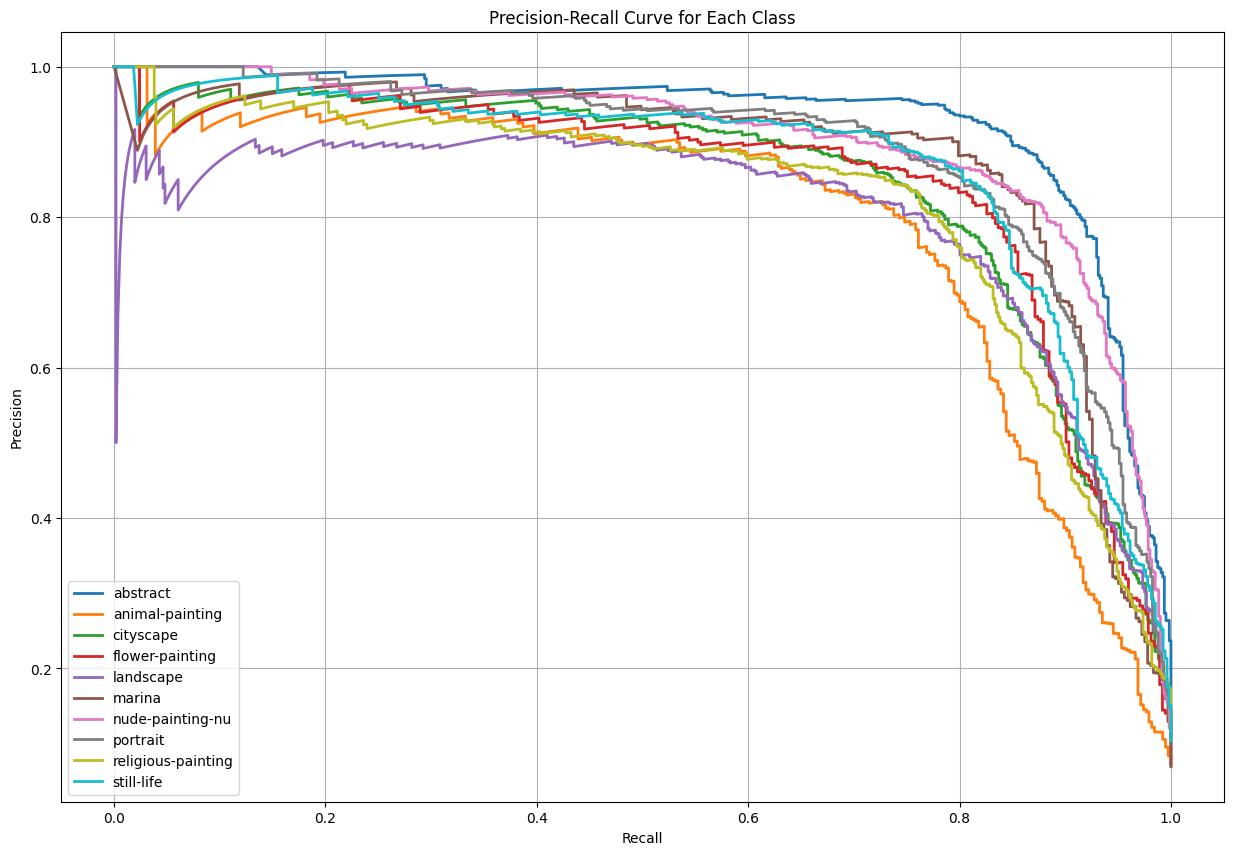

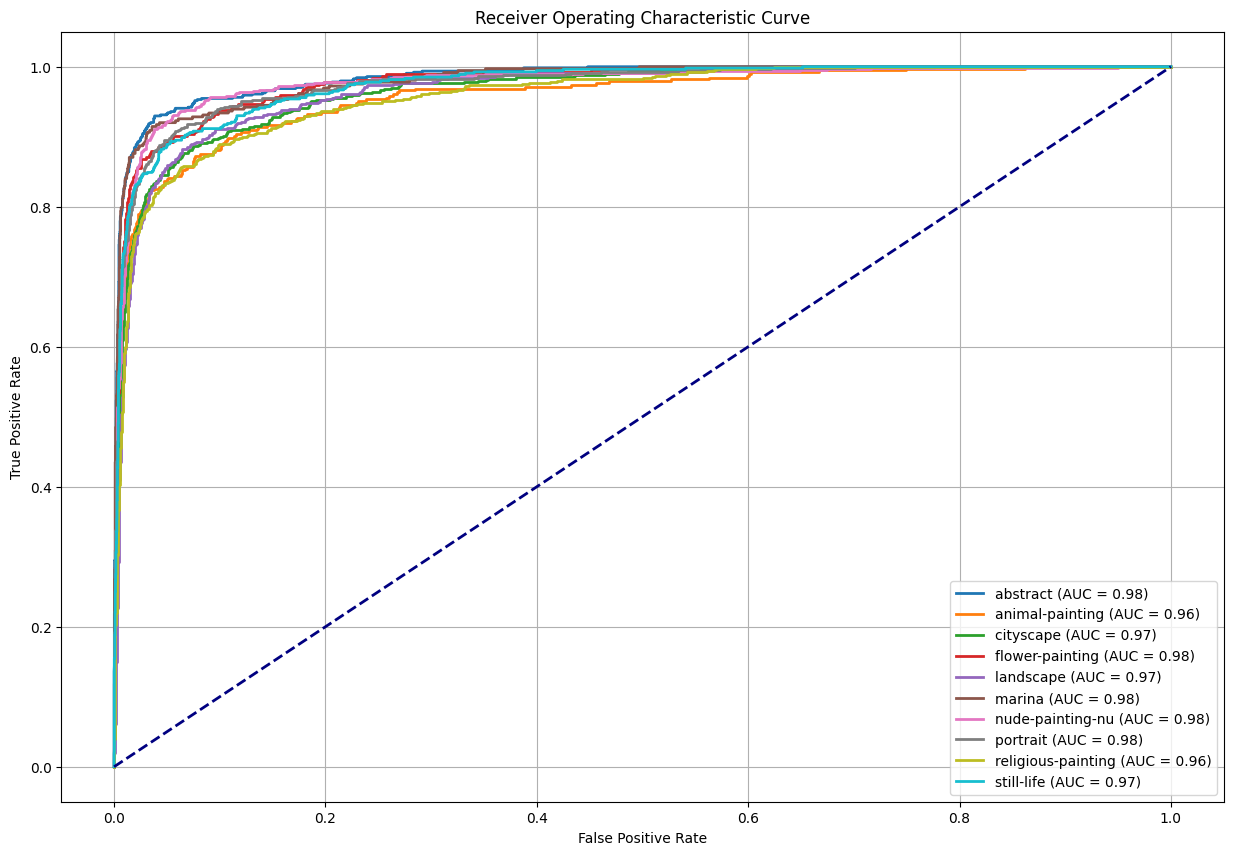

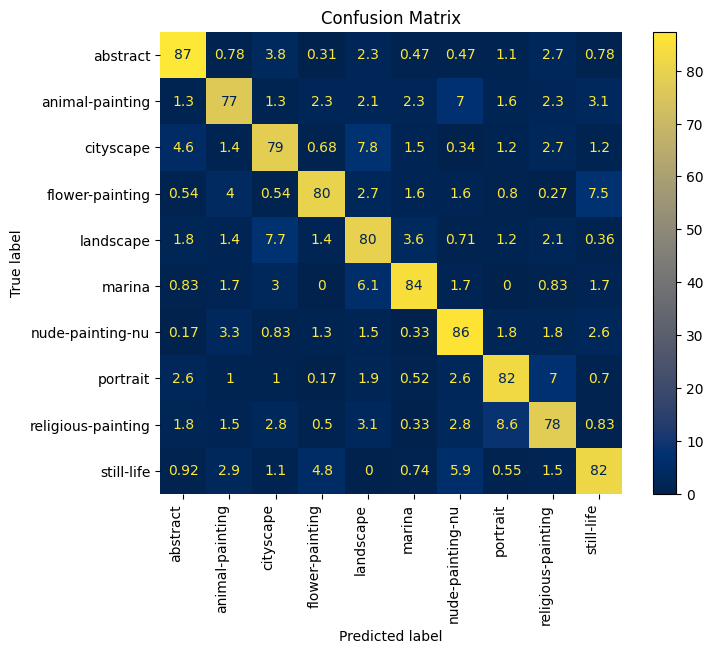

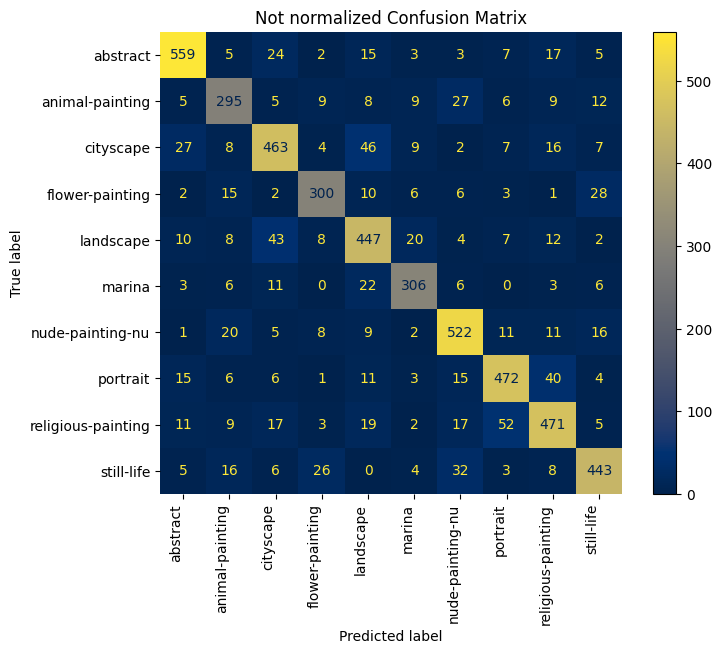

In [6]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(
    hidden_layer_sizes=(460, 140, 113),  
    solver='lbfgs',
    learning_rate_init=0.0003442691569297126,
    alpha= 5.2073160459223636e-06,  
    batch_size=32,  
    activation='relu',  
    max_iter=451,  
    random_state=42,
    early_stopping=True  
)

mlp_model.fit(X_train_scaled, y_train)
frmodel_pred = mlp_model.predict(X_test_scaled)
frmodel_pred_proba = mlp_model.predict_proba(X_test_scaled)

evaluate_model(y_test,frmodel_pred,frmodel_pred_proba)

In [7]:
mlp_model = MLPClassifier(
    hidden_layer_sizes=(460, 140, 113),  
    solver='lbfgs',
    learning_rate_init=0.0003442691569297126,
    alpha= 5.2073160459223636e-06,  
    batch_size=32,  
    activation='relu',  
    max_iter=451,  
    random_state=42,
    early_stopping=True  
)

avg= e.kfold_crossvalidation(train_data, train_labels, 5,  mlp_model , 1)
print(avg)
print("....")

       Fold  Precision    Recall        F1  Accuracy  Train time  \
0         1   0.800737  0.800305  0.800319  0.800305   38.725960   
1         2   0.815679  0.815388  0.815420  0.815388   38.270153   
2         3   0.809531  0.809051  0.809161  0.809051   41.216471   
3         4   0.823962  0.823754  0.823626  0.823754   40.182955   
4         5   0.813356  0.812679  0.812857  0.812679   38.285885   
5   Average   0.812653  0.812235  0.812277  0.812235   39.336285   
6  1.581139   0.008504  0.008592  0.008540  0.008592    1.310002   

   Prediction time  
0         0.030649  
1         0.084430  
2         0.091446  
3         0.031886  
4         0.078685  
5         0.063419  
6         0.029699  
....
